In [4]:
import pandas as pd

# 读取 CSV 文件
# file_path = './prolific_experiment/experimental_results/humans_experiment2.csv'
file_path = './processed_file_1.csv'
data = pd.read_csv(file_path)

# 创建一个透视表，以 'uncertainty_expression' 为行，'response' 为列
response_pivot = data.groupby(['uncertainty_expression', 'response']).size().unstack(fill_value=0)

# 按列排序（确保列顺序为 0 到 100）
response_pivot = response_pivot.reindex(columns=range(0, 101, 5), fill_value=0)

# 添加一列计算每个 'uncertainty_expression' 的 response 总和
response_pivot['Total'] = response_pivot.sum(axis=1)

# 保存结果到 CSV 文件
output_file = './daoyang_results/response_pivot_with_totals_4.csv'
response_pivot.to_csv(output_file)

print(f"统计结果已保存到 {output_file}")

统计结果已保存到 ./daoyang_results/response_pivot_with_totals_4.csv


/tmp/ipykernel_1246/3970190041.py:61: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([""] + normalized_data.index.tolist() + [""])


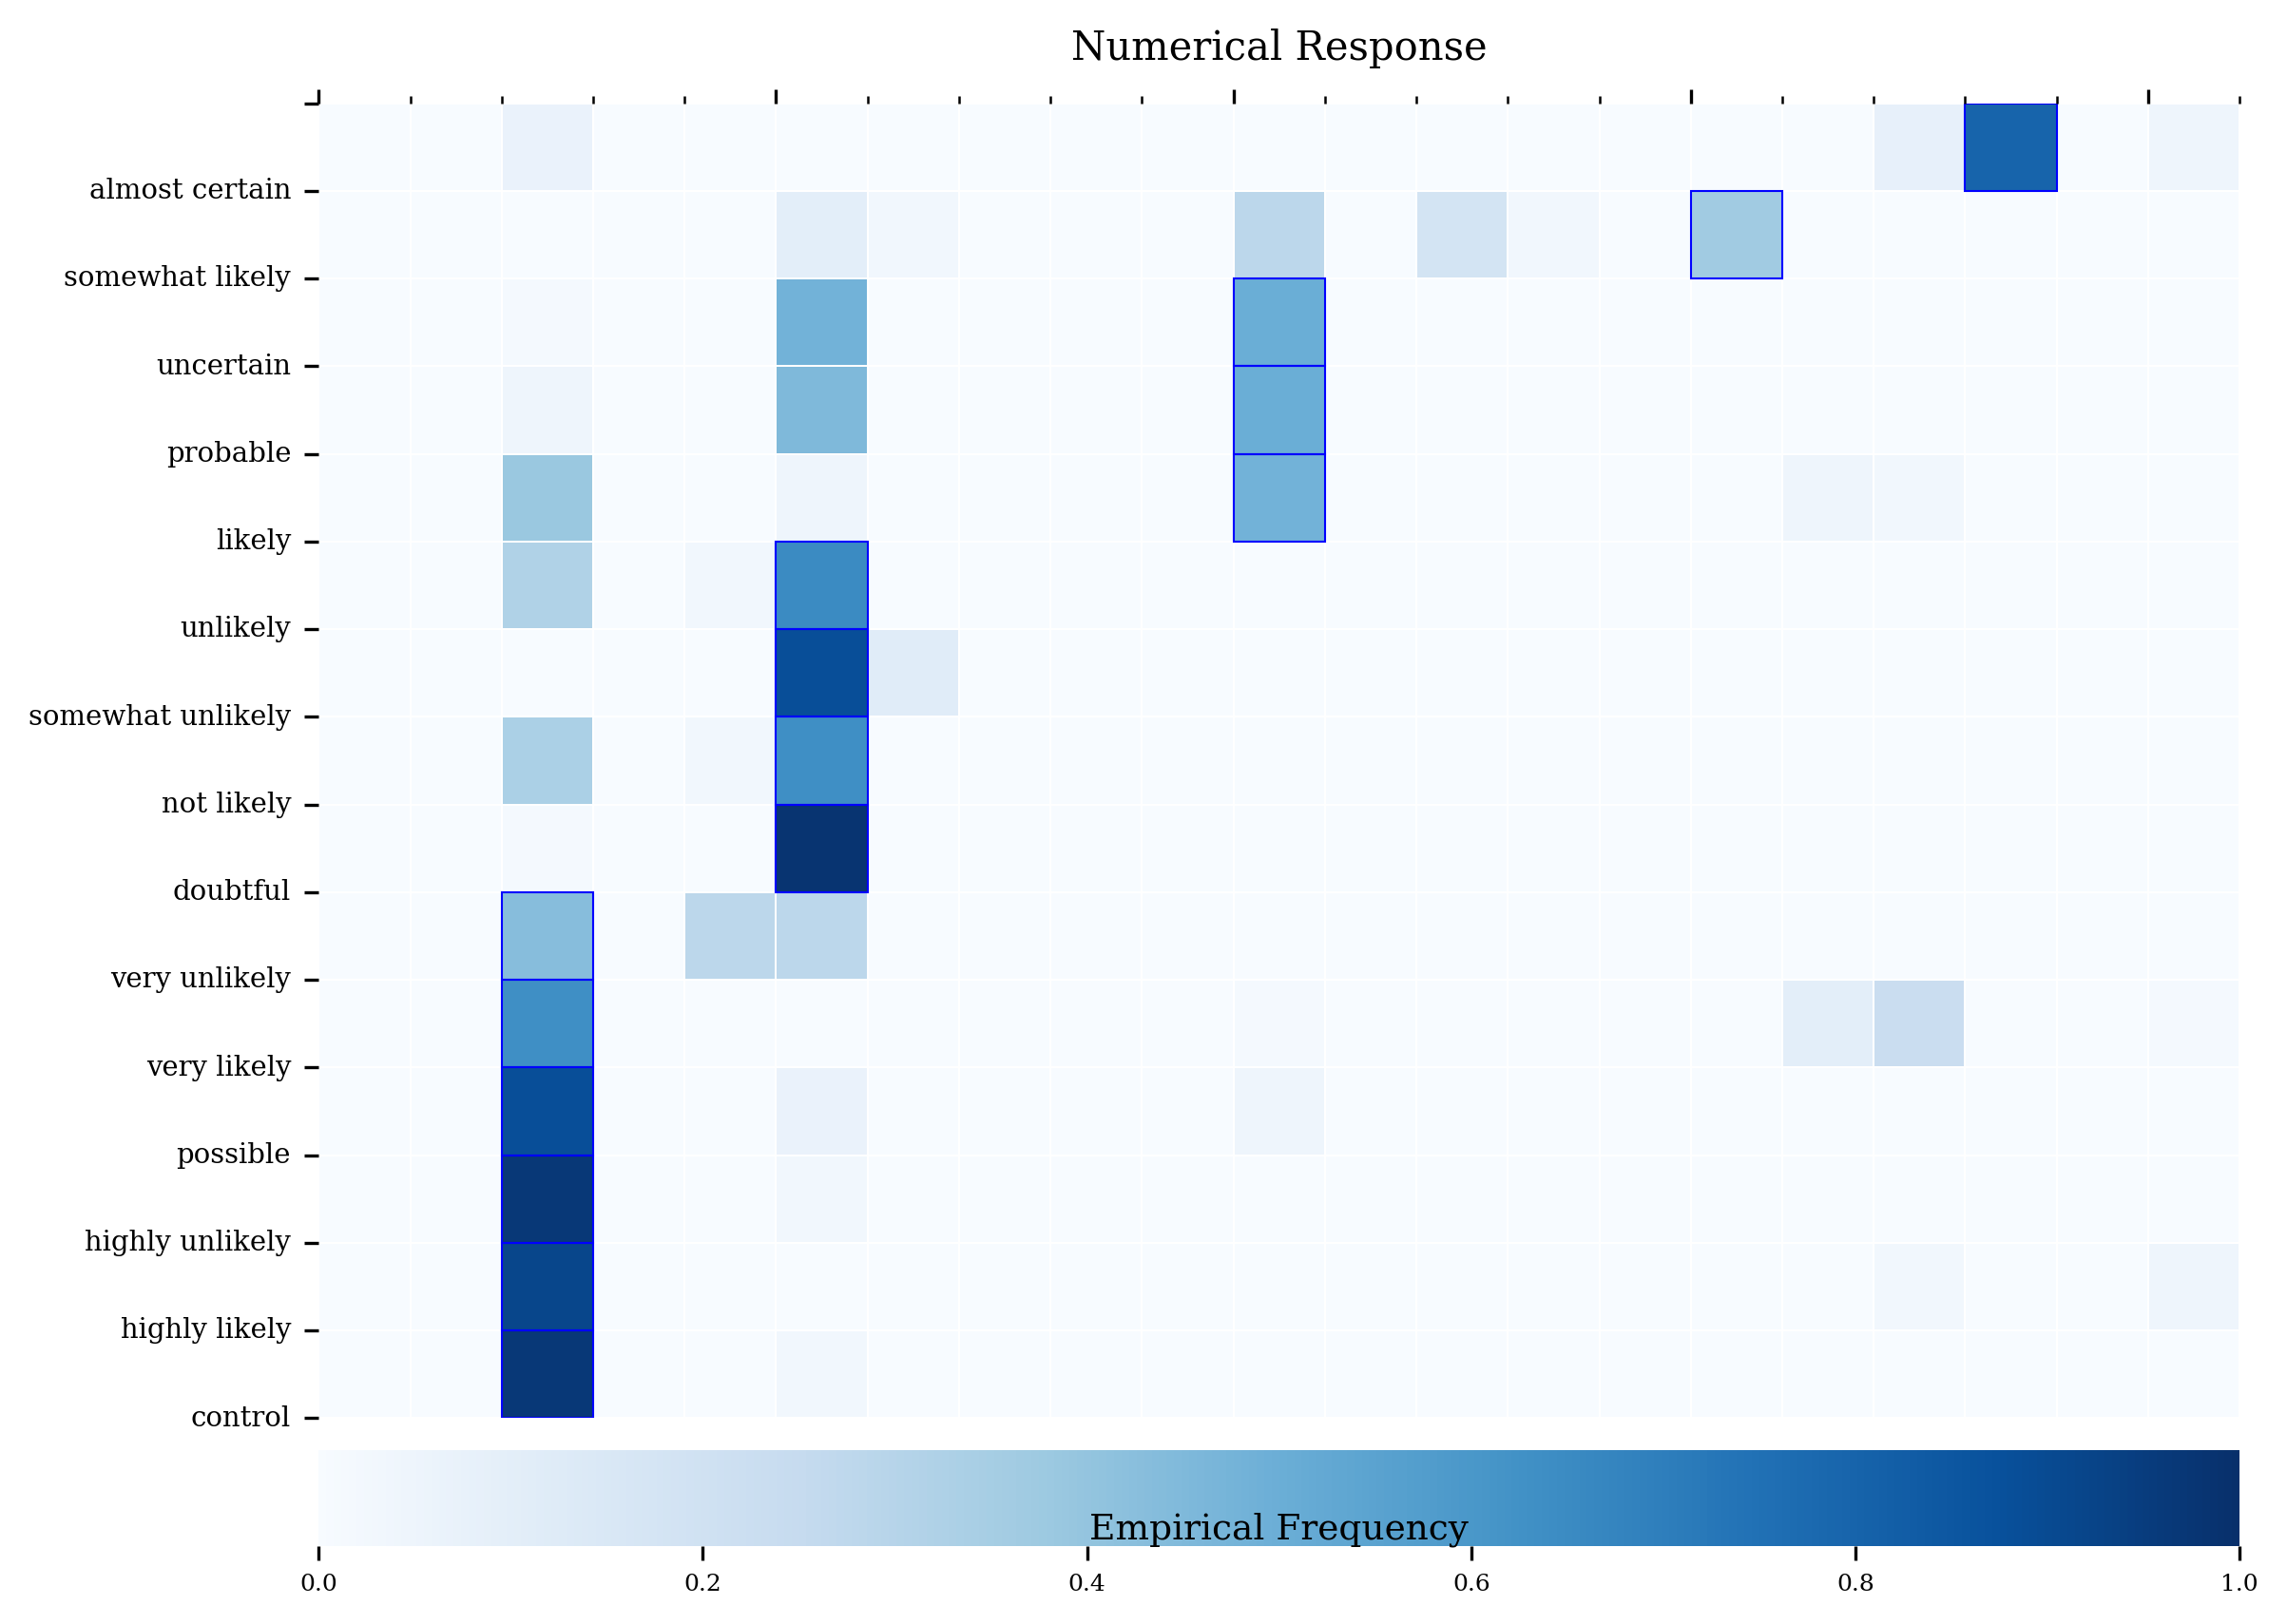

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MultipleLocator

# 读取生成的 CSV 文件
file_path = './daoyang_results/response_pivot_with_totals_4.csv'
data = pd.read_csv(file_path, index_col=0)

# 去除 'Total' 列，因为它不用于热力图
data_no_total = data.drop(columns=['Total'])

# 按每行最大值的位置排序
data_sorted = data_no_total.iloc[np.argsort(data_no_total.idxmax(axis=1))]

# 正则化数据（归一化到 0-1 之间，用于绘制频率热力图）
normalized_data = data_sorted.div(data_sorted.sum(axis=1), axis=0).fillna(0)

# 设置字体和绘图大小
plt.rc('font', family='serif', size=6)
fig, ax = plt.subplots(1, 1, figsize=(8, 6), dpi=300)

# 绘制热力图
heatmap_kwargs = dict(
    vmin=0, vmax=1, cmap="Blues", linecolor='white', linewidth=0.01,
    cbar_kws={
        'label': 'Empirical Frequency',
        'orientation': 'horizontal',
        'shrink': 1,
        'aspect': 20,
        'pad': 0.02,
    },
)
heatmap = sns.heatmap(normalized_data, ax=ax, **heatmap_kwargs)

# 调整颜色条
cbar = heatmap.collections[0].colorbar
cbar.set_label('Empirical Frequency', labelpad=-21, fontsize=9)
cbar.ax.tick_params(labelsize=6)

# 添加高亮框用于标注最大值
highlight_coords = np.argwhere(normalized_data.values == normalized_data.values.max(axis=1, keepdims=True))
for coord in highlight_coords:
    y, x = coord
    rect = plt.Rectangle([x, y], 1, 1, fill=False, edgecolor='blue', linewidth=0.5)
    ax.add_patch(rect)

# 调整标签和刻度
ax.set_xlabel("Numerical Response", fontsize=10)
ax.xaxis.set_label_position('top')
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.set_ylabel(None)
ax.yaxis.set_major_locator(MultipleLocator(1))

# 反转 y 轴
ax.invert_yaxis()

# 设置标签
ax.set_yticklabels([""] + normalized_data.index.tolist() + [""])

ax.tick_params(which="minor", bottom=False, left=True, top=True)
ax.tick_params(top=True, bottom=False, labeltop=True, labelbottom=False)
plt.setp(ax.get_xticklabels(), rotation=0, ha="center", fontsize=7)
plt.setp(ax.get_yticklabels(), rotation=0, ha="right", fontsize=7)

# 保存图像
plt.tight_layout()
plt.savefig('./daoyang_results/sorted_response_inverted_heatmap_4.png', dpi=300)
plt.show()